## Receiver Operating Characteristic (ROC) curve and AUC

A graphical model illustrating the performance of a binary classifier. It's plotted as True Positive Rate (TPR)
against False Positive Rate (FPR).

### Definitions

Assume having a set of training data (X, Y) where each $y \in Y$ is either 0 or 1. We have a binary classifier that
predicts labels for each $x \in X$.

- True Positive (TP): Number of labels classified correctly as positive
- True Negative (TN): Number of labels classified correctly as negative
- False Positive (FN): Number of negative samples labeled incorrectly as positive
- False Negative (FN): Number of positive samples labeled incorrectly as negative

One can show the above counts in a "Confusion Matrix":

<div style="text-align: center;">

| **Actual \ Predicted** | **Positive** | **Negative** |
|:----------------------:|:------------:|:------------:|
| **Positive**           | True Positive (TP)  | False Negative (FN) |
| **Negative**           | False Positive (FP) | True Negative (TN)  |

</div>

- True Positive Rate (TPR): Rate of correctly classifying positive samples 
$$
TRP = \frac{TP}{TP+FN}
$$

- False Positive Rate (FPR): Rate of incorrectly classifying negative samples
$$
FPR = \frac{FP}{FP+TN}
$$

In [25]:
!pip install scipy==1.11.4 scikit-plot


[notice] A new release of pip is available: 24.1.1 -> 24.3.1
[notice] To update, run: pip install --upgrade pip


In [26]:
from sklearn.datasets import load_digits
from sklearn.model_selection import train_test_split
from sklearn.naive_bayes import GaussianNB

# Load digit dataset with 2 class
X, y = load_digits(return_X_y=True, n_class=2)

# Split
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.4)

# Fit a Gaussian Naive Bayes model
nb = GaussianNB()
nb.fit(X_train, y_train)

# Get predictions
predicted_probs = nb.predict_proba(X_test)

In [27]:
from sklearn.metrics import confusion_matrix

# Get predictions from probabilities
y_predicted = predicted_probs.argmax(axis=1)

# Compute confusion matrix 
conf_matrix = confusion_matrix(y_test, y_predicted)
conf_matrix

array([[76,  2],
       [ 0, 66]])

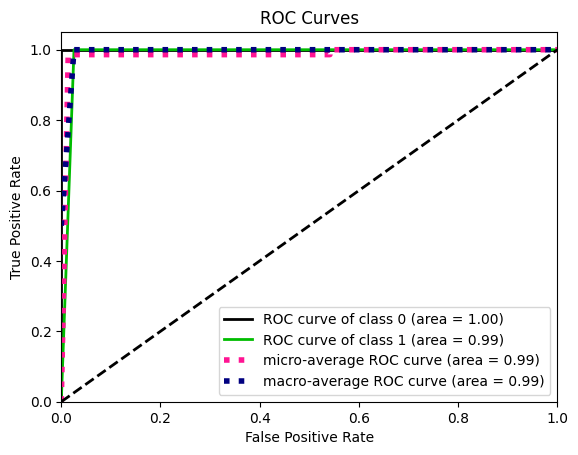

In [28]:
# Plot ROC using scikitplot
import matplotlib.pyplot as plt
import scikitplot as skplt
skplt.metrics.plot_roc(y_test, predicted_probs, plot_macro=True, plot_micro=True, classes_to_plot =None)
plt.show()

### References

- https://en.wikipedia.org/wiki/Receiver_operating_characteristic
- https://towardsdatascience.com/understanding-auc-roc-curve-68b2303cc9c5
- https://developers.google.com/machine-learning/crash-course/classification/roc-and-auc